In [1]:
# Add Matplotlib inline magic command.
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load CSVs from.
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a Pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a Pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# CITY DATA - get all the columns and rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# CITY DATA - another method for finding null values in your data.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# CITY DATA - inspect the types of data in the columns.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# CITY DATA - find how many data points there are for each type of city.
city_data_df.type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [10]:
# RIDE DATA - get all the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# RIDE DATA - similarly, perform the same null value calculation.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# RIDE DATA - look at column data types.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data (MERGE) into a single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# And displayed the joint DataFrame.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [25]:
# Get the number of rides for Urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for Suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for Rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [27]:
# Get the average fare for Urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

# Get the average fare for Suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

# Get the average fare for Rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [29]:
# Get the average number of drivers for Urban cities.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for Suburban cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for Rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

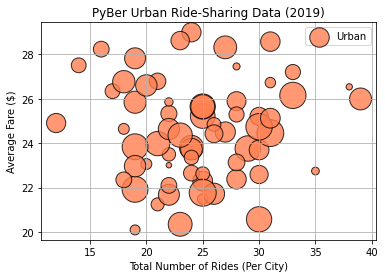

In [38]:
# Create the Urban cities bubble chart.
plt.scatter(urban_ride_count, urban_avg_fare,
            label="Urban",
            s=urban_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="coral",
            alpha=0.8)
plt.grid(True)
plt.title("PyBer Urban Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Add a legend.
plt.legend()

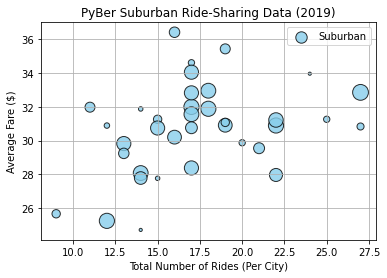

In [40]:
# Create the Suburban cities bubble chart.
plt.scatter(suburban_ride_count, suburban_avg_fare,
            label="Suburban",
            s=suburban_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="skyblue",
            alpha=0.8)
plt.grid(True)
plt.title("PyBer Suburban Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Add a legend.
plt.legend()

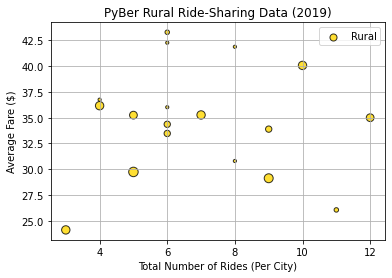

In [41]:
# Create the Rural cities bubble chart.
plt.scatter(rural_ride_count, rural_avg_fare,
            label="Rural",
            s=rural_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="gold",
            alpha=0.8)
plt.grid(True)
plt.title("PyBer Rural Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Add a legend.
plt.legend()

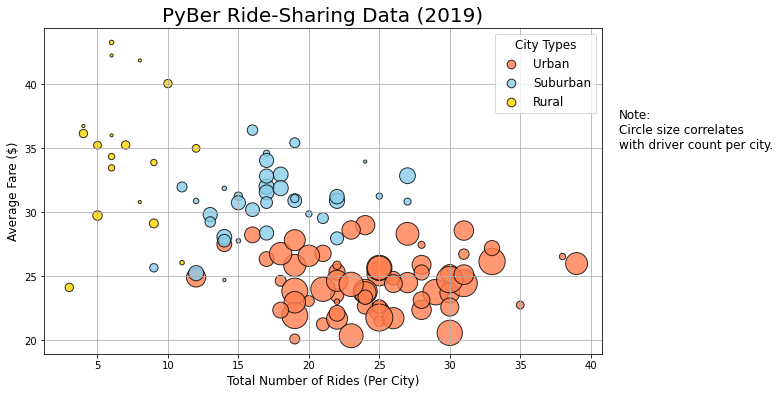

In [75]:
# Create a bubble chart for all cities (combine our current charts).
plt.scatter(urban_ride_count, urban_avg_fare,
            label="Urban",
            s=urban_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="coral",
            alpha=0.8)

plt.scatter(suburban_ride_count, suburban_avg_fare,
            label="Suburban",
            s=suburban_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="skyblue",
            alpha=0.8)

plt.scatter(rural_ride_count, rural_avg_fare,
            label="Rural",
            s=rural_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="gold",
            alpha=0.8)



# Add some formatting.
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# Create a format the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add an informative note.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

### ADDED TO CORRECT SIZING ###
plt.rcParams["figure.figsize"] = (8,6)
###############################

# Save this graph to a picture file.
plt.savefig("analysis/Fig1.png", dpi=300, bbox_inches = "tight")

fig_width, fig_height = plt.gcf().get_size_inches()

In [93]:
# Get summary statistics for the city DataFrames.
display(urban_cities_df.describe(), suburban_cities_df.describe(), rural_cities_df.describe())

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [94]:
# Get summary statistics of urban ride count Series.
display(urban_ride_count.describe(), suburban_ride_count.describe(), rural_ride_count.describe())

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [100]:
# Calculate the mean of the ride count for each city. Using Pandas built-in function.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [101]:
# Calculate the median of the ride count for each city. Using Pandas built-in function.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [105]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [106]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [109]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts of urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
# For suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts of suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")
# For rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts of rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts of urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mean for the ride counts of suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mean for the ride counts of rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [113]:
# Create city Series of the "fare" column.
urban_fares = urban_cities_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

# Create city Series of the "fare" column.
suburban_fares = suburban_cities_df["fare"]
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

# Create city Series of the "fare" column.
rural_fares = rural_cities_df["fare"]
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [126]:
# Get driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.0f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.0f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

# Get driver count data from the suburban cities.
suburban_drivers = suburban_cities_df["driver_count"]
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.0f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.0f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

# Get driver count data from the rural cities.
rural_drivers = rural_cities_df["driver_count"]
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.0f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.0f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

The mean driver count for urban cities is 37.
The median driver count for urban cities is 37.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean driver count for suburban cities is 14.
The median driver count for suburban cities is 16.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean driver count for rural cities is 4.
The median driver count for rural cities is 4.
The mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


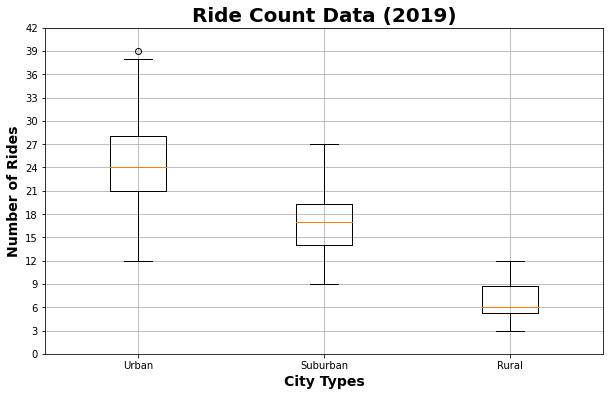

In [145]:
# Create a box-and-whisker plot for the all the cities ride counts.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))

# Add titling and formatting.
ax.set_title("Ride Count Data (2019)", fontsize=20, weight="bold")
ax.set_ylabel("Number of Rides", fontsize=14, weight="bold")
ax.set_xlabel("City Types", fontsize=14, weight="bold")

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save our figure.
plt.savefig("analysis/Fig2.png")

In [147]:
# One outlier in Urban - let's find it.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


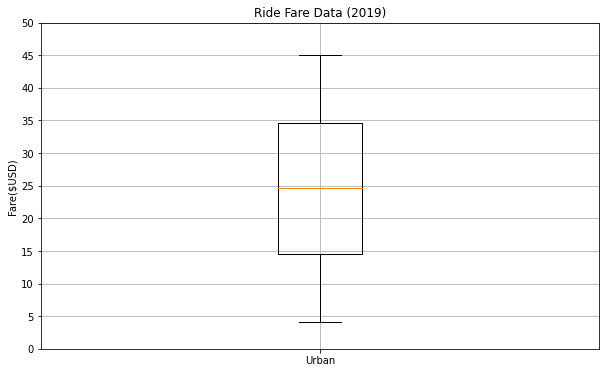

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [149]:
# Create a box-and-whisker plot for the urban fare data we sorted earlier.
x_labels = ["Urban"]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(urban_fares, labels=x_labels)

# Add titles and formatting.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

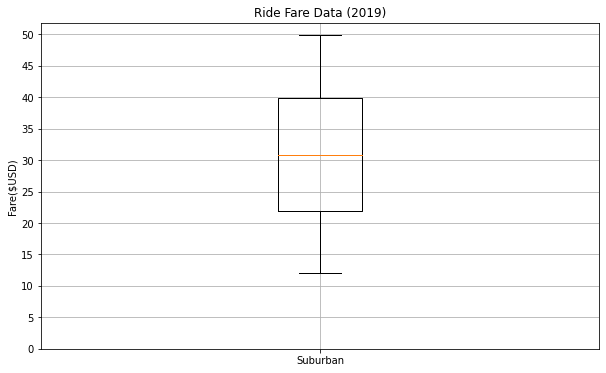

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [162]:
# Create a box-and-whisker plot for the suburban fare data we sorted earlier.
x_labels = ["Suburban"]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(suburban_fares, labels=x_labels)

# Add titles and formatting.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

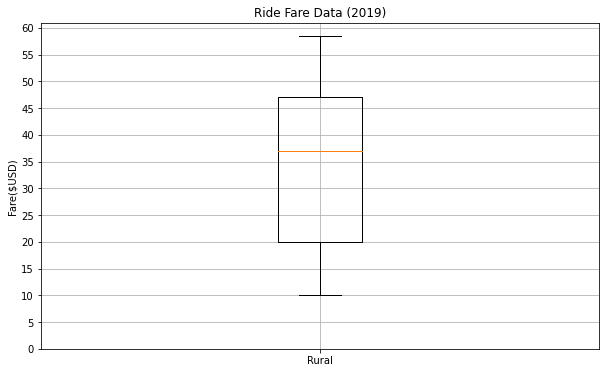

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [163]:
# Create a box-and-whisker plot for the rural fare data we sorted earlier.
x_labels = ["Rural"]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(rural_fares, labels=x_labels)

# Add titles and formatting.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

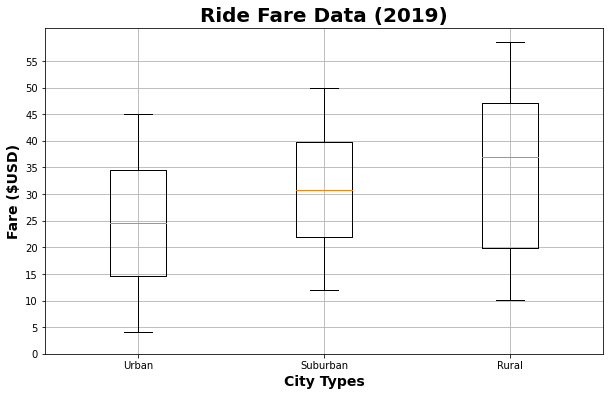

In [179]:
# Now combine these 3 box-and-whisker graphs into one.
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels=x_labels)

# Add titles and formatting.
ax.set_title('Ride Fare Data (2019)', fontsize=20, weight="bold")
ax.set_ylabel('Fare ($USD)', fontsize=14, weight="bold")
ax.set_xlabel('City Types', fontsize=14, weight="bold")
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")

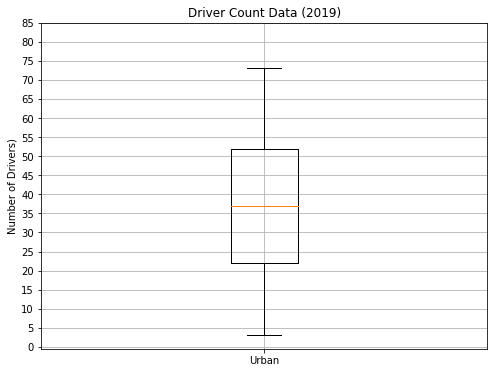

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [161]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

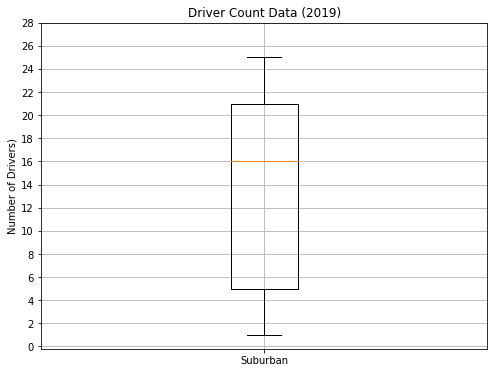

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [174]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

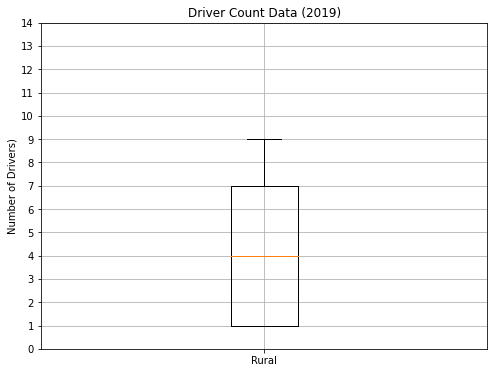

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [170]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 15, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

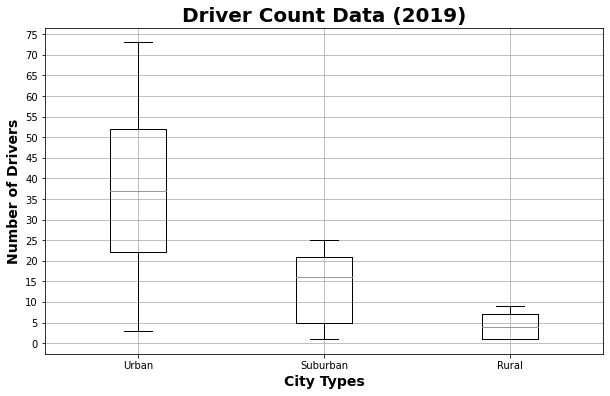

In [180]:
# Now combine these 3 box-and-whisker graphs into one.
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data, labels=x_labels)

# Add titles and formatting.
ax.set_title('Driver Count Data (2019)', fontsize=20, weight="bold")
ax.set_ylabel('Number of Drivers', fontsize=14, weight="bold")
ax.set_xlabel('City Types', fontsize=14, weight="bold")
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

plt.savefig("analysis/Fig4.png")